<a href="https://colab.research.google.com/github/lostboy0427/CalendarControl/blob/main/%E6%95%B0%E6%8D%AE%E5%8F%AF%E8%A7%86%E5%8C%96.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [39]:
# 数据加载
df = pd.read_csv('/content/Student Mental health.csv')
df.info()

# 预处理数据
print("查看缺失值：")
print(df.isnull().sum())
print("查看重复值：")
print(df.duplicated().sum())

#处理缺失值 - 用年龄中位数填充
df['Age'] = df['Age'].fillna(df['Age'].median())


# 重命名相关列，方便操作
df = df.rename(columns={
    'Do you have Depression?': 'Depression',
    'Do you have Anxiety?': 'Anxiety',
    'Do you have Panic attack?': 'PanicAttack',
    'Choose your gender': 'Gender',
    'Your current year of Study': 'Grade',
    'What is your CGPA?': 'CGPA',
    'What is your course?': 'Major',
    'Did you seek any specialist for a treatment?': 'Treatment'
})


#文本标准化
df.columns = [col.strip() for col in df.columns]
df['Grade'] = df['Grade'].str.lower().replace(',', '')
df['Major'] = df['Major'].str.lower()


#分类变量编码
df['Gender'] = df['Gender'].str.strip().str.lower().apply(lambda x: 0 if x == 'male' else 1)
df['Depression'] = df['Depression'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Anxiety'] = df['Anxiety'].apply(lambda x: 1 if x == 'Yes' else 0)
df['PanicAttack'] = df['PanicAttack'].apply(lambda x: 1 if x == 'Yes' else 0)

#编码年份
year_mapping = {'year 1': 1, 'year 2': 2, 'year 3': 3, 'year 4': 4}
df['Grade'] = df['Grade'].map(year_mapping)

#编码CGPA范围
cgpa_order = ['0 - 1.99', '2.00 - 2.49', '2.50 - 2.99', '3.00 - 3.49', '3.50 - 4.00']
df['CGPA'] = pd.Categorical(df['CGPA'], categories=cgpa_order, ordered=True).codes


# 生成新列 Healthy
df['Healthy'] = df.apply(
    lambda row: 0 if 'Yes' in [row['Depression'], row['Anxiety'], row['PanicAttack']] else 1,
    axis=1
)
# print(df[['Depression', 'Anxiety', 'PanicAttack', 'Healthy']])

major_to_group = {
    # STEM (Science, Technology, Engineering, Math)
    'bcs': 'STEM', 'bit': 'STEM', 'cts': 'STEM', 'it': 'STEM',
    'engineering': 'STEM', 'engine': 'STEM', 'engin': 'STEM',
    'biomedical science': 'STEM', 'biotechnology': 'STEM',
    'marine science': 'STEM', 'koe': 'STEM', 'mathemathics': 'STEM',
    'enm': 'STEM',

    # Business & Law
    'accounting': 'Business & Law', 'banking studies': 'Business & Law',
    'business administration': 'Business & Law', 'econs': 'Business & Law',
    'kenms': 'Business & Law', 'human resources': 'Business & Law',
    'law': 'Business & Law', 'laws': 'Business & Law',

    # Humanities & Social Sciences
    'psychology': 'Humanities', 'human sciences': 'Humanities',
    'malcom': 'Humanities', 'communication': 'Humanities',
    'ala': 'Humanities', 'benl': 'Humanities',
    'taasl': 'Humanities', 'diploma tesl': 'Humanities',

    # Islamic & Religious Studies
    'fiqh': 'Islamic Studies', 'fiqh fatwa': 'Islamic Studies',
    'usuluddin': 'Islamic Studies', 'islamic education': 'Islamic Studies',
    'pendidikan islam': 'Islamic Studies', 'irkhs': 'Islamic Studies',
    'kirkhs': 'Islamic Studies',

    # Medical & Health
    'nursing': 'Medical & Health', 'diploma nursing': 'Medical & Health',
    'mhsc': 'Medical & Health', 'radiography': 'Medical & Health',
    'kop': 'Medical & Health'
}

df['Major'] = df['Major'].str.strip().str.lower().map(major_to_group).fillna('其他')
# print(df['Major'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 non-null    obj

Index([0, 1], dtype='int64', name='Gender')


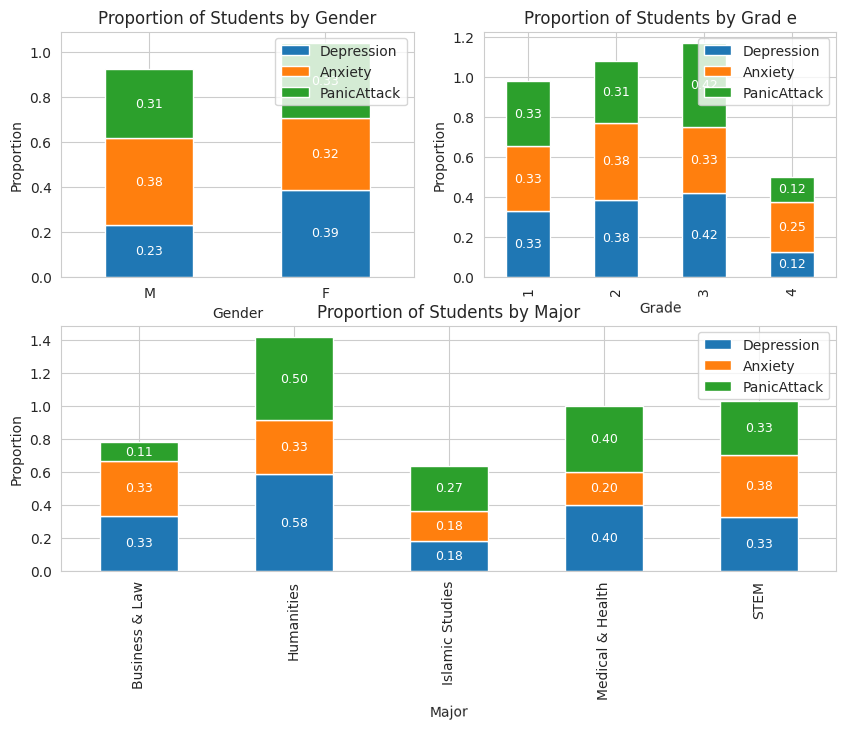

In [40]:
sns.set_style('whitegrid')
# 1. 堆叠条形图 - 不同性别、年级、专业中患有抑郁、焦虑、恐慌的学生比例
plt.figure(figsize=(10, 7))

#  按性别
plt.subplot(2, 2, 1)
gender_group = df.groupby('Gender')[['Depression', 'Anxiety', 'PanicAttack']].mean()
ax = gender_group.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Proportion of Students by Gender')
plt.ylabel('Proportion')
plt.xticks([0, 1], ['M', 'F'], rotation=0)
print(gender_group.index)

for i, gender in enumerate(gender_group.index):
    cumulative = 0
    for j, column in enumerate(gender_group.columns):
        value = gender_group.loc[gender, column]
        cumulative += value
        ax.text(i, cumulative - value / 2, f'{value:.2f}', ha='center', va='center', fontsize=9, color='white')


#  按年级
plt.subplot(2, 2, 2)
grade_group = df.groupby('Grade')[['Depression', 'Anxiety', 'PanicAttack']].mean()
ax = grade_group.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Proportion of Students by Grad e')
plt.ylabel('Proportion')
plt.xlabel('Grade', rotation=1)

for i, grade in enumerate(grade_group.index):
    cumulative = 0
    for j, column in enumerate(grade_group.columns):
        value = grade_group.loc[grade, column]
        cumulative += value
        ax.text(i, cumulative - value / 2, f'{value:.2f}', ha='center', va='center', fontsize=9, color='white')

# 按专业
plt.subplot(2, 1, 2)
major_group = df.groupby('Major')[['Depression', 'Anxiety', 'PanicAttack']].mean()
ax = major_group.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Proportion of Students by Major')
plt.ylabel('Proportion')
plt.xlabel('Major', rotation=1)

for i, major in enumerate(major_group.index):
    cumulative = 0
    for j, column in enumerate(major_group.columns):
        value = major_group.loc[major, column]
        cumulative += value
        ax.text(i, cumulative - value / 2, f'{value:.2f}', ha='center', va='center', fontsize=9, color='white')

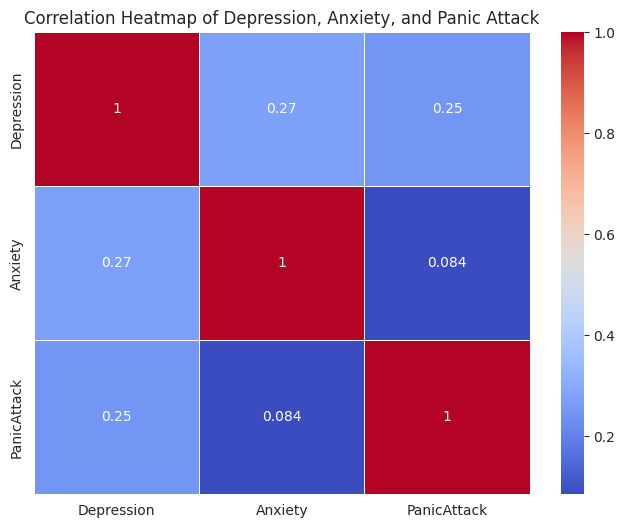

In [41]:
#2. 热力图 - 抑郁、焦虑、恐慌三者之间的共现关系及相关性
plt.figure(figsize=(8, 6))
correlation_matrix = df[['Depression', 'Anxiety', 'PanicAttack']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Depression, Anxiety, and Panic Attack')
plt.show()

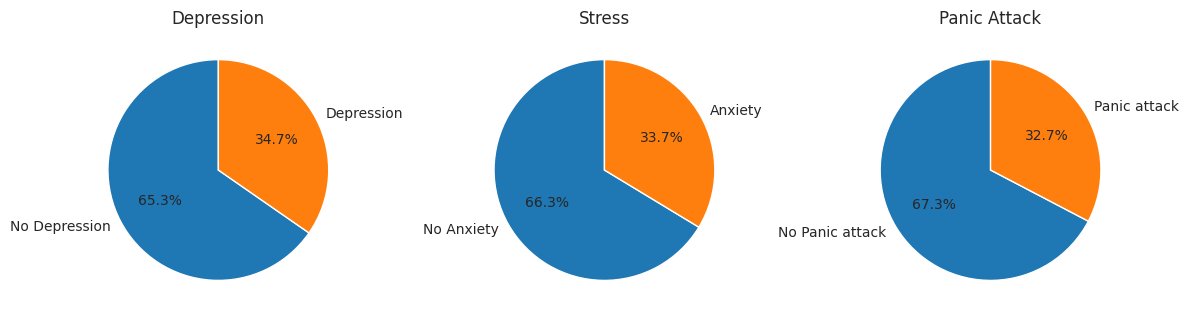

In [42]:
# 3. 饼图 - 整体心理健康问题的分布
plt.figure(figsize=(12, 6))

# 半饼图 - 抑郁
plt.subplot(1, 3, 1)
depression_counts = df['Depression'].value_counts()
plt.pie(depression_counts, labels=['No Depression', 'Depression'], autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=1))
plt.title('Depression')

# 半饼图 - 焦虑
plt.subplot(1, 3, 2)
anxiety_counts = df['Anxiety'].value_counts()
plt.pie(anxiety_counts, labels=['No Anxiety', 'Anxiety'], autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=1))
plt.title('Stress')

# 半饼图 - 恐慌
plt.subplot(1, 3, 3)
panic_counts = df['PanicAttack'].value_counts()
plt.pie(panic_counts, labels=['No Panic attack', 'Panic attack'], autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=1))
plt.title('Panic Attack')

plt.tight_layout()
plt.show()

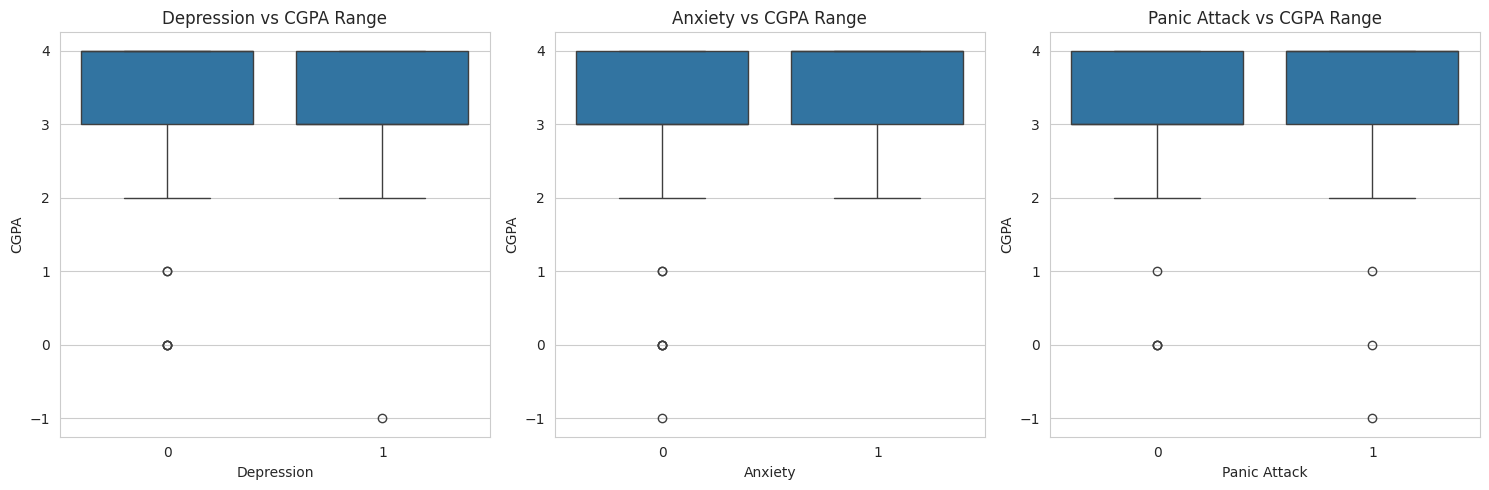

In [43]:
# 4. 分组箱线图 - 比较有无心理问题的学生在CGPA上的分布差异

plt.figure(figsize=(15, 5))

# 抑郁与CGPA
plt.subplot(1, 3, 1)
sns.boxplot(x='Depression', y='CGPA', data=df)
plt.title('Depression vs CGPA Range')
plt.xlabel('Depression')
plt.ylabel('CGPA')

# 焦虑与CGPA
plt.subplot(1, 3, 2)
sns.boxplot(x='Anxiety', y='CGPA', data=df)
plt.title('Anxiety vs CGPA Range')
plt.xlabel('Anxiety')
plt.ylabel('CGPA')

# 恐慌与CGPA
plt.subplot(1, 3, 3)
sns.boxplot(x='PanicAttack', y='CGPA', data=df)
plt.title('Panic Attack vs CGPA Range')
plt.xlabel('Panic Attack')
plt.ylabel('CGPA')

plt.tight_layout()
plt.show()

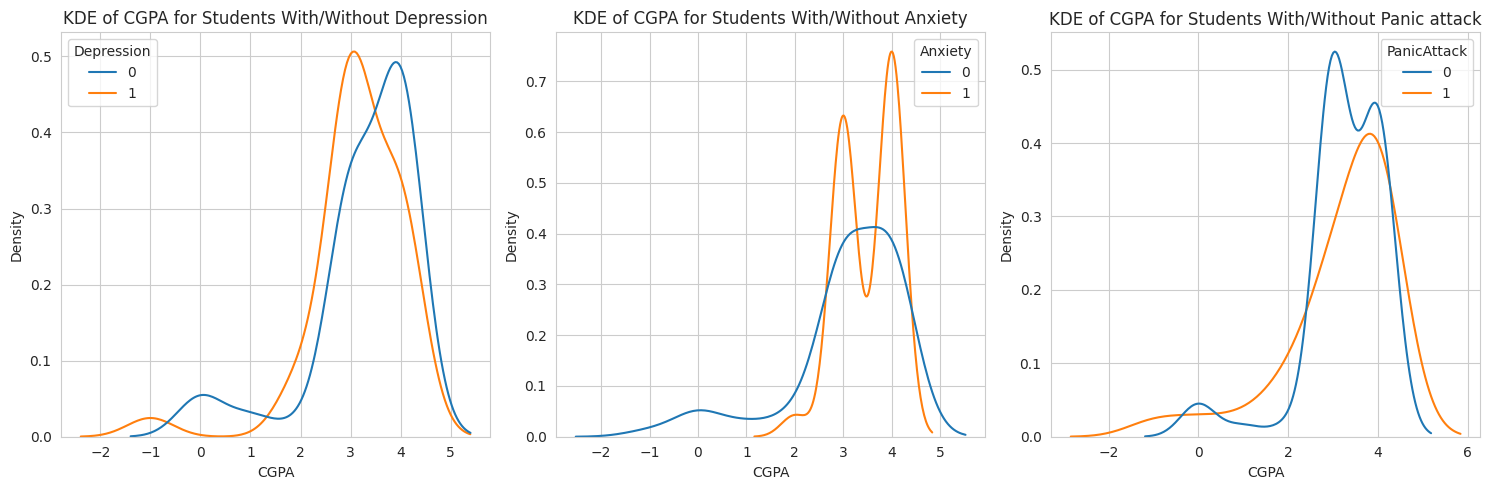

In [44]:
# 4. KDE图 - 比较有无心理问题的学生在CGPA上的分布差异

plt.figure(figsize=(15, 5))
# KDE plot
plt.subplot(1, 3, 1)
sns.kdeplot(data=df, x='CGPA', hue='Depression', common_norm=False)
plt.title('KDE of CGPA for Students With/Without Depression')
plt.xlabel('CGPA')
plt.ylabel('Density')
plt.grid(True)

plt.subplot(1, 3, 2)
sns.kdeplot(data=df, x='CGPA', hue='Anxiety', common_norm=False)
plt.title('KDE of CGPA for Students With/Without Anxiety')
plt.xlabel('CGPA')
plt.ylabel('Density')
plt.grid(True)

plt.subplot(1, 3, 3)
sns.kdeplot(data=df, x='CGPA', hue='PanicAttack', common_norm=False)
plt.title('KDE of CGPA for Students With/Without Panic attack')
plt.xlabel('CGPA')
plt.ylabel('Density')
plt.grid(True)

plt.tight_layout()
plt.show()

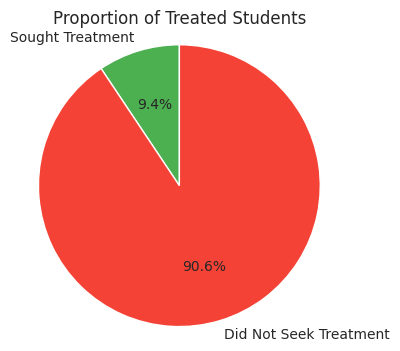

在有心理健康问题的学生中，寻求专业治疗的情况统计：
Treatment
Yes     6
No     58
Name: count, dtype: int64
总共有心理问题的学生人数: 64
寻求治疗的比例: 9.4%


In [45]:
# 4. 饼图 - 寻求治疗所占比例

df['Has_Mental_Health_Issue'] = (
    (df['Depression'] == 1) |
    (df['Anxiety'] == 1) |
    (df['PanicAttack'] == 1)
)

students_with_issues = df[df['Has_Mental_Health_Issue']]

treatment_status = students_with_issues['Treatment'].value_counts()

# 确保包含 Yes 和 No，即使某个值为0
treatment_status = treatment_status.reindex(['Yes', 'No'], fill_value=0)

# 7. 绘制饼图：在所有有心理问题的学生中，寻求治疗的比例
plt.figure(figsize=(4, 4))
colors = ['#4CAF50', '#F44336']  # 绿色表示“是”，红色表示“否”
plt.pie(treatment_status, labels=['Sought Treatment', 'Did Not Seek Treatment'],
        autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Proportion of Treated Students')
plt.axis('equal')  # 保证饼图为圆形
plt.show()

# 输出统计信息
print("在有心理健康问题的学生中，寻求专业治疗的情况统计：")
print(treatment_status)
print(f"总共有心理问题的学生人数: {len(students_with_issues)}")
print(f"寻求治疗的比例: {treatment_status['Yes'] / len(students_with_issues) * 100:.1f}%")

In [46]:
import plotly.express as px

fig = px.histogram(
    df,
    x='Major',
    color='Has_Mental_Health_Issue',
    barmode='group', # 将柱子并排显示
    title='不同专业下学生心理健康状况分布',
    labels={'Grade': '年级', 'Healthy': '心理健康状况', 'count': '学生数量'},
    category_orders={"Healthy_Label": ["Healthy", "Unhealthy"]}, # 确保 Healthy 在 Unhealthy 前面显示
    color_discrete_map={'Healthy': 'lightgreen', 'Unhealthy': 'salmon'} # 自定义颜色
)

fig.update_layout(
    xaxis_title_text='年级',
    yaxis_title_text='学生数量',
    legend_title_text='心理健康状况'
)

fig.show()

# 显示新生成的 'Healthy' 列的前几行，以供检查
print(df[['Depression', 'Anxiety', 'PanicAttack', 'Healthy', 'Has_Mental_Health_Issue', 'Grade']].head(10))

   Depression  Anxiety  PanicAttack  Healthy  Has_Mental_Health_Issue  Grade
0           1        0            1        1                     True      1
1           0        1            0        1                     True      2
2           1        1            1        1                     True      1
3           1        0            0        1                     True      3
4           0        0            0        1                    False      4
5           0        0            1        1                     True      2
6           1        0            1        1                     True      2
7           0        1            0        1                     True      1
8           0        0            0        1                    False      2
9           0        1            1        1                     True      1


In [47]:

fig = px.histogram(
    df,
    x='Gender',
    color='Has_Mental_Health_Issue',
    barmode='group', # 将柱子并排显示
    title='不同性别下学生心理健康状况分布',
    labels={'Gender': '性别', 'Healthy': '心理健康状况', 'count': '学生数量'},
    category_orders={"Healthy_Label": ["Healthy", "Unhealthy"]}, # 确保 Healthy 在 Unhealthy 前面显示
    color_discrete_map={'Healthy': 'lightgreen', 'Unhealthy': 'salmon'} # 自定义颜色
)

fig.update_layout(
    xaxis_title_text='性别',
    yaxis_title_text='学生数量',
    legend_title_text='心理健康状况'
)

fig.show()

# 显示新生成的 'Healthy' 列的前几行，以供检查
print(df[['Depression', 'Anxiety', 'PanicAttack', 'Healthy', 'Has_Mental_Health_Issue', 'Grade']].head(10))

   Depression  Anxiety  PanicAttack  Healthy  Has_Mental_Health_Issue  Grade
0           1        0            1        1                     True      1
1           0        1            0        1                     True      2
2           1        1            1        1                     True      1
3           1        0            0        1                     True      3
4           0        0            0        1                    False      4
5           0        0            1        1                     True      2
6           1        0            1        1                     True      2
7           0        1            0        1                     True      1
8           0        0            0        1                    False      2
9           0        1            1        1                     True      1
